In [3]:
import gradio as gr
from fastai.vision.all import *

def is_cat(x): return x[0].isupper()

/Users/preme/Aii/assignment3/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


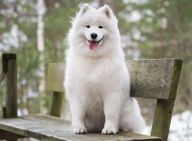

In [4]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [5]:
learn = load_learner('model.pkl')


In [6]:
learn.predict(im)

('False', tensor(0), tensor([0.9976, 0.0024]))

In [7]:
categories = ('Dog', 'Cat')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [8]:
classify_image(im)


{'Dog': 0.9976462721824646, 'Cat': 0.0023537378292530775}

In [9]:
image = gr.Image()
label = gr.Label()
examples = ['dog.jpg', 'cat.jpg', 'blackcat.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [10]:
m = learn.model

In [11]:
ps = list(m.parameters())

In [12]:
ps[1]

Parameter containing:
tensor([ 0.2442,  0.2755, -0.0092,  0.5281,  0.0095,  0.2317,  0.4322,  0.0094,
         0.2605,  0.0094,  0.3082,  0.2599,  0.3884,  0.0095,  0.2847,  0.2463,
         0.2515,  0.4047,  0.4788,  0.3003,  0.2819,  0.2875,  0.3001,  0.2163,
         0.2683,  0.2881,  0.2818,  0.3253,  0.3795,  0.2945,  0.2770,  0.2203,
         0.2964,  0.3418,  0.4362,  0.3826,  0.0094,  0.2001,  0.0094,  0.2325,
         0.1886,  0.2580,  0.2646,  0.2498,  0.3037,  0.3088,  0.2331,  0.2722,
         0.0094,  0.2757,  0.2304,  0.2939,  0.3401,  0.2362,  0.3749,  0.2030,
         0.2491,  0.2591,  0.5353,  0.2578,  0.3051,  0.2681,  0.4737,  0.2760],
       requires_grad=True)